In [1]:
import pandas as pd
import numpy as np

#for plotting
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\DELL\AppData\Local\Temp\ipykernel_3384\2884751752.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data = pd.read_csv("Dataset_17_feat.csv")

In [3]:
data.head()

,Experimental_index,DP_Group,LA/GA,Polymer_MW,CL Ratio,Drug_Tm,Drug_Pka,Initial D/M ratio,DLC,SA-V,SE,Drug_Mw,Drug_TPSA,Drug_NHA,Drug_LogP,Time,T=0.25,T=0.5,T=1.0,Release
0,80,5-FU-PLGA,1.0,104000.0,0.0,282.5,7.76,0.8,0.35,76.73,0.0,130.08,65.72,5.0,-0.8,0.00,0.09,0.19,0.35,0.00
1,80,5-FU-PLGA,1.0,104000.0,0.0,282.5,7.76,0.8,0.35,76.73,0.0,130.08,65.72,5.0,-0.8,0.26,0.09,0.19,0.35,0.07
2,80,5-FU-PLGA,1.0,104000.0,0.0,282.5,7.76,0.8,0.35,76.73,0.0,130.08,65.72,5.0,-0.8,1.06,0.09,0.19,0.35,0.40
3,80,5-FU-PLGA,1.0,104000.0,0.0,282.5,7.76,0.8,0.35,76.73,0.0,130.08,65.72,5.0,-0.8,2.09,0.09,0.19,0.35,0.57
4,80,5-FU-PLGA,1.0,104000.0,0.0,282.5,7.76,0.8,0.35,76.73,0.0,130.08,65.72,5.0,-0.8,3.11,0.09,0.19,0.35,0.69


In [5]:
drug_list=list(data["DP_Group"].unique())

In [7]:
drug_list

['5-FU-PLGA',
 'ACE-PVL-co-PAVL',
 'CAF-PLGA',
 'CBD-PCL',
 'CBD-PLGA',
 'CCM-PVL-co-PAVL',
 'DEX-PEA',
 'DEX-PLGA',
 'DPP-PLGA',
 'ETC-PCL',
 'GEF-PLGA',
 'HPA-PLGA',
 'IBP-PLGA',
 'LDC-PLGA',
 'LPA-PLGA',
 'LTZ-PLGA',
 'PRC-PLGA',
 'PTX-PLA',
 'PTX-PLA-co-PALA',
 'PTX-PLGA',
 'PTX-PLGA-co-PALA',
 'PTX-PLGA-co-PAVL',
 'PTX-PVL-co-PAVL',
 'QRC-PCL',
 'TAA-PEA',
 'TAA-PLA-co-PALA',
 'TAA-PLGA',
 'TAA-PLGA-co-PALA',
 'TAA-PLGA-co-PAVL',
 'TAA-PVL-co-PAVL',
 'TAH-PVL-co-PAVL',
 'THC-PCL',
 'TMZ-PLGA',
 'TTD-PLGA']

In [12]:
#total 34 combination of drugs
len(drug_list)

34

In [11]:
#PLGA based dds
plga_dds=[]
for dds in drug_list:
    if 'PLGA' in dds:
        plga_dds.append(dds)

In [15]:
#total PLGA Combination
len(plga_dds)

20

In [14]:
plga_dds

['5-FU-PLGA',
 'CAF-PLGA',
 'CBD-PLGA',
 'DEX-PLGA',
 'DPP-PLGA',
 'GEF-PLGA',
 'HPA-PLGA',
 'IBP-PLGA',
 'LDC-PLGA',
 'LPA-PLGA',
 'LTZ-PLGA',
 'PRC-PLGA',
 'PTX-PLGA',
 'PTX-PLGA-co-PALA',
 'PTX-PLGA-co-PAVL',
 'TAA-PLGA',
 'TAA-PLGA-co-PALA',
 'TAA-PLGA-co-PAVL',
 'TMZ-PLGA',
 'TTD-PLGA']

In [19]:
(data["Polymer_MW"].unique())

array([104000.,  15000.,  39000.,  46000.,  42500.,  12000.,  51000.,
        49000.,  13000.,  28000.,  10000.,  44000.,  25000.,  20000.,
        40000.,  48000.,  57700., 106000.,   9500., 105000.,  57500.,
       108000.,  11000.,  10200.,  32000.,  32125.,  32250.,  32625.,
        33250.,  14000.,  18000.,  54000.,   8300.])

In [21]:
(data["Drug_Mw"].unique())                  

array([ 130.08,  151.17,  194.19,  314.47,  368.39,  392.47,  254.25,
        358.85,  446.91,  242.32,  206.29,  234.34, 1269.47,  285.31,
        331.35,  853.92,  338.27,  434.5 ,  532.65,  194.15,  325.5 ])

In [20]:
(data["CL Ratio"].unique())

array([0.  , 0.18, 0.07, 0.06, 0.04, 0.15, 0.14, 0.13, 0.11])

In [24]:
#Total 181 experimental index
len(list(data["Experimental_index"].unique()))                       

181

### Drugs of only PLGA formulation

In [25]:
df=data[data["DP_Group"].str.contains('PLGA')]
df

,Experimental_index,DP_Group,LA/GA,Polymer_MW,CL Ratio,Drug_Tm,Drug_Pka,Initial D/M ratio,DLC,SA-V,SE,Drug_Mw,Drug_TPSA,Drug_NHA,Drug_LogP,Time,T=0.25,T=0.5,T=1.0,Release
0,80,5-FU-PLGA,1.0,104000.0,0.0,282.5,7.76,0.8,0.35,76.73,0.00,130.08,65.72,5.0,-0.80,0.00,0.09,0.19,0.35,0.00
1,80,5-FU-PLGA,1.0,104000.0,0.0,282.5,7.76,0.8,0.35,76.73,0.00,130.08,65.72,5.0,-0.80,0.26,0.09,0.19,0.35,0.07
2,80,5-FU-PLGA,1.0,104000.0,0.0,282.5,7.76,0.8,0.35,76.73,0.00,130.08,65.72,5.0,-0.80,1.06,0.09,0.19,0.35,0.40
3,80,5-FU-PLGA,1.0,104000.0,0.0,282.5,7.76,0.8,0.35,76.73,0.00,130.08,65.72,5.0,-0.80,2.09,0.09,0.19,0.35,0.57
4,80,5-FU-PLGA,1.0,104000.0,0.0,282.5,7.76,0.8,0.35,76.73,0.00,130.08,65.72,5.0,-0.80,3.11,0.09,0.19,0.35,0.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3778,89,TTD-PLGA,1.0,8300.0,0.0,206.0,10.28,0.1,0.06,112.25,0.01,325.50,23.47,2.0,5.34,19.86,0.06,0.09,0.15,0.99
3779,89,TTD-PLGA,1.0,8300.0,0.0,206.0,10.28,0.1,0.06,112.25,0.01,325.50,23.47,2.0,5.34,21.88,0.06,0.09,0.15,1.00
3780,89,TTD-PLGA,1.0,8300.0,0.0,206.0,10.28,0.1,0.06,112.25,0.01,325.50,23.47,2.0,5.34,24.16,0.06,0.09,0.15,1.00
3781,89,TTD-PLGA,1.0,8300.0,0.0,206.0,10.28,0.1,0.06,112.25,0.01,325.50,23.47,2.0,5.34,26.19,0.06,0.09,0.15,1.00


In [26]:
df.shape

(1914, 20)

In [40]:
#only PLGA based DDS
df["DP_Group"].unique()

array(['5-FU-PLGA', 'CAF-PLGA', 'CBD-PLGA', 'DEX-PLGA', 'DPP-PLGA',
       'GEF-PLGA', 'HPA-PLGA', 'IBP-PLGA', 'LDC-PLGA', 'LPA-PLGA',
       'LTZ-PLGA', 'PRC-PLGA', 'PTX-PLGA', 'PTX-PLGA-co-PALA',
       'PTX-PLGA-co-PAVL', 'TAA-PLGA', 'TAA-PLGA-co-PALA',
       'TAA-PLGA-co-PAVL', 'TMZ-PLGA', 'TTD-PLGA'], dtype=object)

### Only PLGA-Drug names

In [76]:
# Mapping dictionary for Drug names
drug_mapping = {
    '5-FU-PLGA': '5-Fluorouracil',
    'CAF-PLGA': 'Caffeine',
    'CBD-PLGA': 'Cannabidiol',
    'DEX-PLGA': 'Dexamethasone',
    'DPP-PLGA': 'DPP',
    'GEF-PLGA': 'Gefitinib',
    'HPA-PLGA': 'Hydroxyapatite',
    'IBP-PLGA': 'Ibuprofen',
    'LDC-PLGA': 'Lidocaine',
    'LPA-PLGA': 'Lipoic acid',
    'LTZ-PLGA': 'Letrozole',
    'PRC-PLGA': 'Pracinostat',
    'PTX-PLGA': 'Paclitaxel',
    'PTX-PLGA-co-PALA': 'Paclitaxel',
    'PTX-PLGA-co-PAVL': 'Paclitaxel',
    'TAA-PLGA': 'Triamcinolone acetonide',
    'TAA-PLGA-co-PAVL': 'TAA',
    'TMZ-PLGA': 'Temozolomide',
    'TTD-PLGA': 'TAA'
}

# df['Drug_name'] = df['DP_Group'].map(drug_mapping)


In [31]:
df

,Experimental_index,DP_Group,LA/GA,Polymer_MW,CL Ratio,Drug_Tm,Drug_Pka,Initial D/M ratio,DLC,SA-V,...,Drug_Mw,Drug_TPSA,Drug_NHA,Drug_LogP,Time,T=0.25,T=0.5,T=1.0,Release,Drug_name
0,80,5-FU-PLGA,1.0,104000.0,0.0,282.5,7.76,0.8,0.35,76.73,...,130.08,65.72,5.0,-0.80,0.00,0.09,0.19,0.35,0.00,5-Fluorouracil
1,80,5-FU-PLGA,1.0,104000.0,0.0,282.5,7.76,0.8,0.35,76.73,...,130.08,65.72,5.0,-0.80,0.26,0.09,0.19,0.35,0.07,5-Fluorouracil
2,80,5-FU-PLGA,1.0,104000.0,0.0,282.5,7.76,0.8,0.35,76.73,...,130.08,65.72,5.0,-0.80,1.06,0.09,0.19,0.35,0.40,5-Fluorouracil
3,80,5-FU-PLGA,1.0,104000.0,0.0,282.5,7.76,0.8,0.35,76.73,...,130.08,65.72,5.0,-0.80,2.09,0.09,0.19,0.35,0.57,5-Fluorouracil
4,80,5-FU-PLGA,1.0,104000.0,0.0,282.5,7.76,0.8,0.35,76.73,...,130.08,65.72,5.0,-0.80,3.11,0.09,0.19,0.35,0.69,5-Fluorouracil
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3778,89,TTD-PLGA,1.0,8300.0,0.0,206.0,10.28,0.1,0.06,112.25,...,325.50,23.47,2.0,5.34,19.86,0.06,0.09,0.15,0.99,TAA
3779,89,TTD-PLGA,1.0,8300.0,0.0,206.0,10.28,0.1,0.06,112.25,...,325.50,23.47,2.0,5.34,21.88,0.06,0.09,0.15,1.00,TAA
3780,89,TTD-PLGA,1.0,8300.0,0.0,206.0,10.28,0.1,0.06,112.25,...,325.50,23.47,2.0,5.34,24.16,0.06,0.09,0.15,1.00,TAA
3781,89,TTD-PLGA,1.0,8300.0,0.0,206.0,10.28,0.1,0.06,112.25,...,325.50,23.47,2.0,5.34,26.19,0.06,0.09,0.15,1.00,TAA


In [32]:
drug_mapping.items()

dict_items([('5-FU-PLGA', '5-Fluorouracil'), ('CAF-PLGA', 'Caffeine'), ('CBD-PLGA', 'Cannabidiol'), ('DEX-PLGA', 'Dexamethasone'), ('DPP-PLGA', 'DPP'), ('GEF-PLGA', 'Gefitinib'), ('HPA-PLGA', 'Hydroxyapatite'), ('IBP-PLGA', 'Ibuprofen'), ('LDC-PLGA', 'Lidocaine'), ('LPA-PLGA', 'Lipoic acid'), ('LTZ-PLGA', 'Letrozole'), ('PRC-PLGA', 'Pracinostat'), ('PTX-PLGA', 'Paclitaxel'), ('PTX-PLGA-co-PALA', 'Paclitaxel'), ('PTX-PLGA-co-PAVL', 'Paclitaxel'), ('TAA-PLGA', 'Triamcinolone acetonide'), ('TAA-PLGA-co-PAVL', 'TAA'), ('TMZ-PLGA', 'Temozolomide'), ('TTD-PLGA', 'TAA')])

In [34]:
#making a dataframe, having dds,drug_name,category
data=[['5-FU-PLGA', '5-Fluorouracil'], ['CAF-PLGA', 'Caffeine'], ['CBD-PLGA', 'Cannabidiol'], ['DEX-PLGA', 'Dexamethasone'], ['DPP-PLGA', 'DPP'], ['GEF-PLGA', 'Gefitinib'], ['HPA-PLGA', 'Hydroxyapatite'], ['IBP-PLGA', 'Ibuprofen'], ['LDC-PLGA', 'Lidocaine'], ['LPA-PLGA', 'Lipoic acid'], ['LTZ-PLGA', 'Letrozole'], ['PRC-PLGA', 'Pracinostat'], ['PTX-PLGA', 'Paclitaxel'], ['PTX-PLGA-co-PALA', 'Paclitaxel'], ['PTX-PLGA-co-PAVL', 'Paclitaxel'], ['TAA-PLGA', 'Triamcinolone acetonide'], ['TAA-PLGA-co-PAVL', 'TAA'], ['TMZ-PLGA', 'Temozolomide'], ['TTD-PLGA', 'TAA']]

In [41]:
#Dataframe having DDS, Drug_Name and Category
df_new=pd.DataFrame(data)
df_new.columns = ['PLGA_DDS','Drug_Name']
df_new

,PLGA_DDS,Drug_Name
0,5-FU-PLGA,5-Fluorouracil
1,CAF-PLGA,Caffeine
2,CBD-PLGA,Cannabidiol
3,DEX-PLGA,Dexamethasone
4,DPP-PLGA,DPP
5,GEF-PLGA,Gefitinib
6,HPA-PLGA,Hydroxyapatite
7,IBP-PLGA,Ibuprofen
8,LDC-PLGA,Lidocaine
9,LPA-PLGA,Lipoic acid


### Cancerous- PLGA

In [42]:
# Cancerous vs Non-cancerous
cancerous_drugs = ['5-Fluorouracil', 'Etoposide', 'Gefitinib', 'Letrozole', 'Pracinostat', 'Paclitaxel', 'Triamcinolone acetonide', 'Temozolomide']

df_cancerous = df[df['Drug_name'].isin(cancerous_drugs)]

df_nonCancerous = df[~df['Drug_name'].isin(cancerous_drugs)]

In [50]:
#cancerous
cancer_list=list(df_cancerous['DP_Group'])
set(cancer_list)

{'5-FU-PLGA',
 'GEF-PLGA',
 'LTZ-PLGA',
 'PRC-PLGA',
 'PTX-PLGA',
 'PTX-PLGA-co-PALA',
 'PTX-PLGA-co-PAVL',
 'TAA-PLGA',
 'TMZ-PLGA'}

In [52]:
#Non Cancerous
Noncancer_list=list(df_nonCancerous['DP_Group'])
set(Noncancer_list)

{'CAF-PLGA',
 'CBD-PLGA',
 'DEX-PLGA',
 'DPP-PLGA',
 'HPA-PLGA',
 'IBP-PLGA',
 'LDC-PLGA',
 'LPA-PLGA',
 'TAA-PLGA-co-PALA',
 'TAA-PLGA-co-PAVL',
 'TTD-PLGA'}

In [60]:
#new column->category column
df_new['Category'] = df_new['PLGA_DDS'].apply(lambda x: 'Cancerous' if x in cancer_list else 'Non_Cancerous')
df_new

,PLGA_DDS,Drug_Name,Category
0,5-FU-PLGA,5-Fluorouracil,Cancerous
1,CAF-PLGA,Caffeine,Non_Cancerous
2,CBD-PLGA,Cannabidiol,Non_Cancerous
3,DEX-PLGA,Dexamethasone,Non_Cancerous
4,DPP-PLGA,DPP,Non_Cancerous
5,GEF-PLGA,Gefitinib,Cancerous
6,HPA-PLGA,Hydroxyapatite,Non_Cancerous
7,IBP-PLGA,Ibuprofen,Non_Cancerous
8,LDC-PLGA,Lidocaine,Non_Cancerous
9,LPA-PLGA,Lipoic acid,Non_Cancerous


In [67]:
#saving the above table as png
# import dataframe_image as dfi
# dfi.export(df_new, 'plga_idx.png')

In [68]:
df.head(5)

,Experimental_index,DP_Group,LA/GA,Polymer_MW,CL Ratio,Drug_Tm,Drug_Pka,Initial D/M ratio,DLC,SA-V,...,Drug_Mw,Drug_TPSA,Drug_NHA,Drug_LogP,Time,T=0.25,T=0.5,T=1.0,Release,Drug_name
0,80,5-FU-PLGA,1.0,104000.0,0.0,282.5,7.76,0.8,0.35,76.73,...,130.08,65.72,5.0,-0.8,0.00,0.09,0.19,0.35,0.00,5-Fluorouracil
1,80,5-FU-PLGA,1.0,104000.0,0.0,282.5,7.76,0.8,0.35,76.73,...,130.08,65.72,5.0,-0.8,0.26,0.09,0.19,0.35,0.07,5-Fluorouracil
2,80,5-FU-PLGA,1.0,104000.0,0.0,282.5,7.76,0.8,0.35,76.73,...,130.08,65.72,5.0,-0.8,1.06,0.09,0.19,0.35,0.40,5-Fluorouracil
3,80,5-FU-PLGA,1.0,104000.0,0.0,282.5,7.76,0.8,0.35,76.73,...,130.08,65.72,5.0,-0.8,2.09,0.09,0.19,0.35,0.57,5-Fluorouracil
4,80,5-FU-PLGA,1.0,104000.0,0.0,282.5,7.76,0.8,0.35,76.73,...,130.08,65.72,5.0,-0.8,3.11,0.09,0.19,0.35,0.69,5-Fluorouracil


In [72]:
df_new.to_csv('plga.csv', index=False)

In [74]:
#Total 131 experimental index
len(list(df["Experimental_index"].unique())) 

113

In [79]:
df.columns

Index(['Experimental_index', 'DP_Group', 'LA/GA', 'Polymer_MW', 'CL Ratio',
       'Drug_Tm', 'Drug_Pka', 'Initial D/M ratio', 'DLC', 'SA-V', 'SE',
       'Drug_Mw', 'Drug_TPSA', 'Drug_NHA', 'Drug_LogP', 'Time', 'T=0.25',
       'T=0.5', 'T=1.0', 'Release', 'Drug_name'],
      dtype='object')

In [80]:
df['Category'] = df['DP_Group'].apply(lambda x: 'Cancerous' if x in cancer_list else 'Non_Cancerous')

In [81]:
df.head(5)

,Experimental_index,DP_Group,LA/GA,Polymer_MW,CL Ratio,Drug_Tm,Drug_Pka,Initial D/M ratio,DLC,SA-V,...,Drug_TPSA,Drug_NHA,Drug_LogP,Time,T=0.25,T=0.5,T=1.0,Release,Drug_name,Category
0,80,5-FU-PLGA,1.0,104000.0,0.0,282.5,7.76,0.8,0.35,76.73,...,65.72,5.0,-0.8,0.00,0.09,0.19,0.35,0.00,5-Fluorouracil,Cancerous
1,80,5-FU-PLGA,1.0,104000.0,0.0,282.5,7.76,0.8,0.35,76.73,...,65.72,5.0,-0.8,0.26,0.09,0.19,0.35,0.07,5-Fluorouracil,Cancerous
2,80,5-FU-PLGA,1.0,104000.0,0.0,282.5,7.76,0.8,0.35,76.73,...,65.72,5.0,-0.8,1.06,0.09,0.19,0.35,0.40,5-Fluorouracil,Cancerous
3,80,5-FU-PLGA,1.0,104000.0,0.0,282.5,7.76,0.8,0.35,76.73,...,65.72,5.0,-0.8,2.09,0.09,0.19,0.35,0.57,5-Fluorouracil,Cancerous
4,80,5-FU-PLGA,1.0,104000.0,0.0,282.5,7.76,0.8,0.35,76.73,...,65.72,5.0,-0.8,3.11,0.09,0.19,0.35,0.69,5-Fluorouracil,Cancerous


In [83]:
df['percentage_release']=df['Release']*100

In [86]:
df['percentage_release'].unique()

array([  0.,   7.,  40.,  57.,  69.,  76.,  82.,  84.,  85.,  86.,  90.,
        93.,  94.,  95.,  97.,  49.,  59.,  65.,  67.,  70.,  72.,  73.,
        77.,  78.,  80.,  83.,  87.,  88., 100.,   8.,  27.,  61.,  63.,
        74.,   5.,  14.,  30.,  44.,  51.,  56.,  58.,  62.,  79.,  81.,
        89.,  91.,  96., 101.,   3.,  10.,  24.,  37.,  43.,  46.,  50.,
        55.,  54.,  66.,  75.,  98.,  16.,  33.,  60.,   1.,  12.,  19.,
        32.,  11.,  18.,  23.,  99.,   4.,  29.,  35.,  42.,   9.,  15.,
        20.,  25.,  34.,   6.,  71.,  13.,  17.,  21.,  39.,   2.,  26.,
        31.,  41.,  68.,  38.,  45.,  48.,  28.,  53.,  52.,  64.,  47.,
       102.,  92., 104., 105., 106., 107.,  36.,  22., 103.])

## EDA

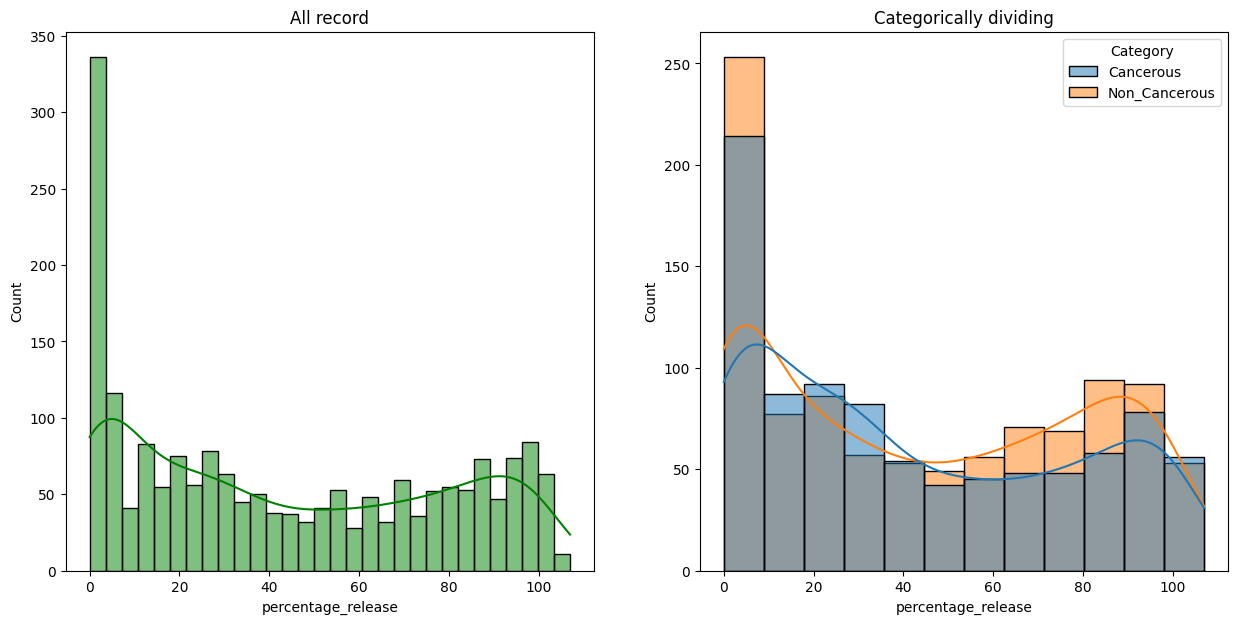

In [98]:
## Reconds Release how is distributed 
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='percentage_release',bins=30,kde=True,color='g')
plt.title('All record')
plt.subplot(122)
sns.histplot(data=df,x='percentage_release',kde=True,hue='Category')
plt.title('Categorically dividing')
plt.show()
##saving the image
#fig.savefig('release_category.png')

In [89]:
df.columns

Index(['Experimental_index', 'DP_Group', 'LA/GA', 'Polymer_MW', 'CL Ratio',
       'Drug_Tm', 'Drug_Pka', 'Initial D/M ratio', 'DLC', 'SA-V', 'SE',
       'Drug_Mw', 'Drug_TPSA', 'Drug_NHA', 'Drug_LogP', 'Time', 'T=0.25',
       'T=0.5', 'T=1.0', 'Release', 'Drug_name', 'Category',
       'percentage_release'],
      dtype='object')

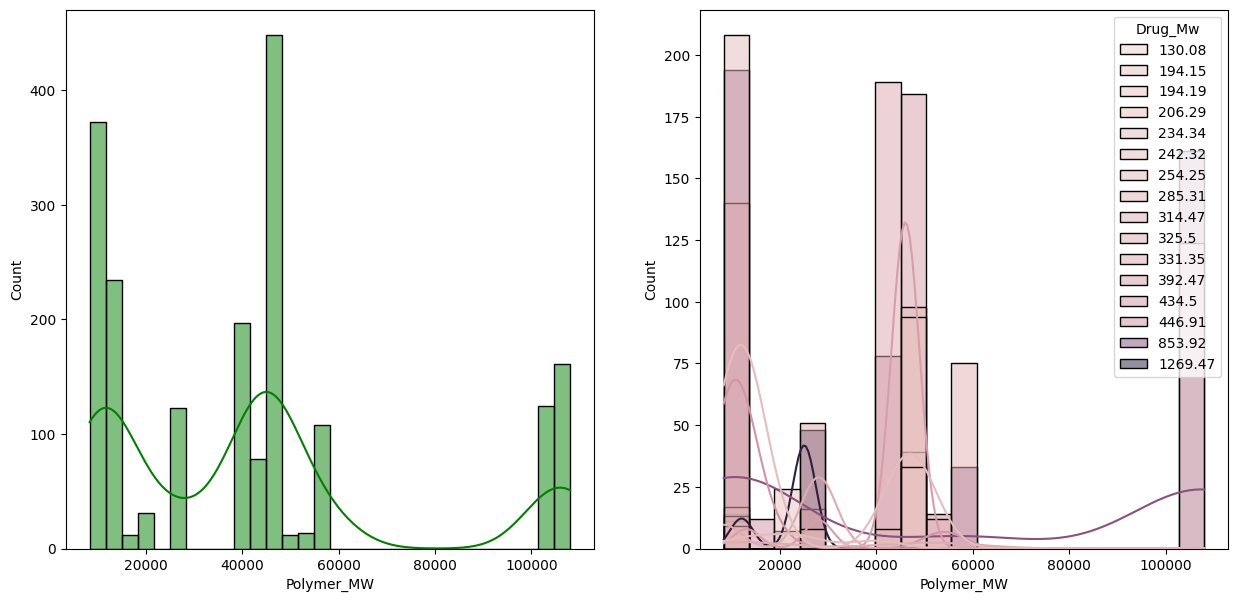

In [92]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Polymer_MW',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Polymer_MW',kde=True,hue='Drug_Mw')
plt.show()

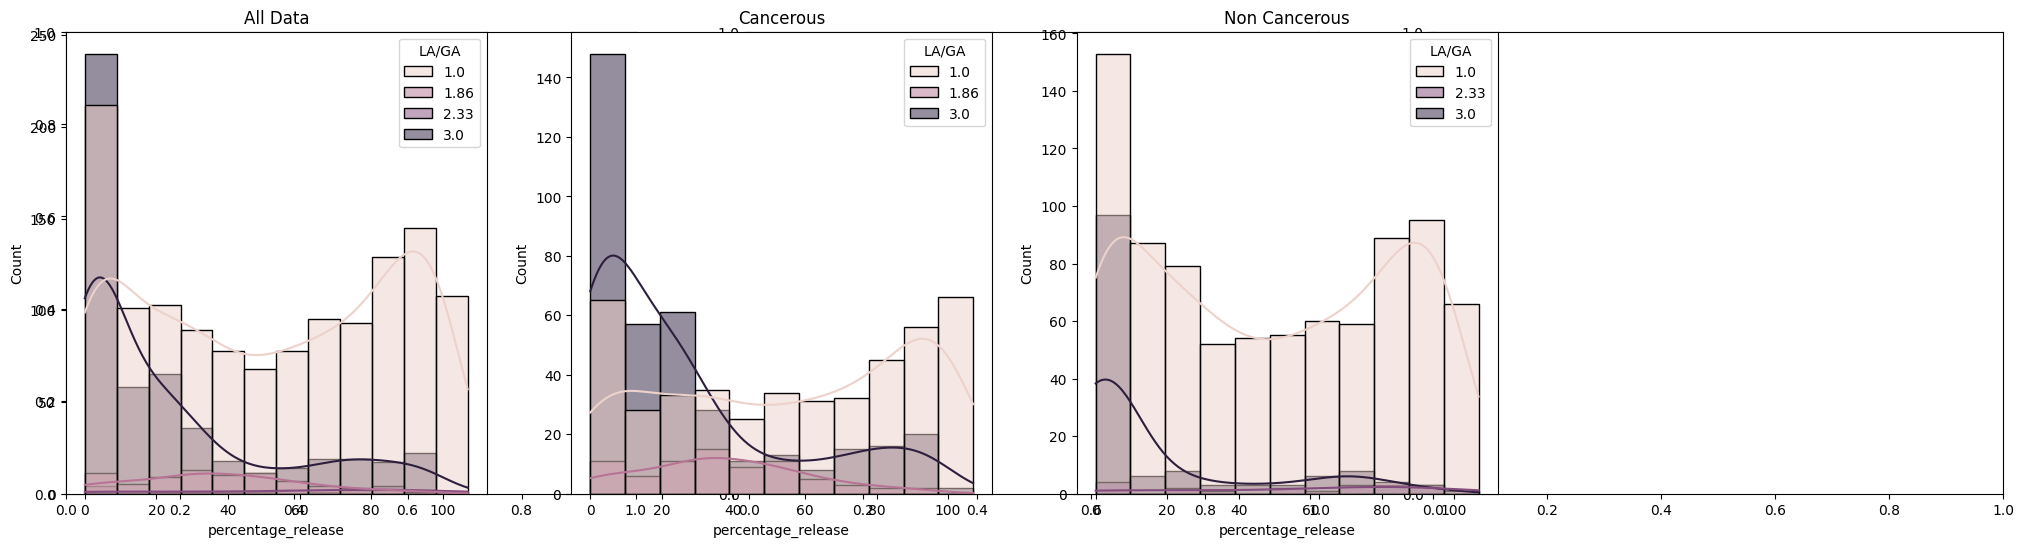

In [188]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='percentage_release',kde=True,hue='LA/GA')
plt.title('All Data')
plt.subplot(142)
sns.histplot(data=df[df.Category=='Cancerous'],x='percentage_release',kde=True,hue='LA/GA')
plt.title('Cancerous')
plt.subplot(143)
sns.histplot(data=df[df.Category=='Non_Cancerous'],x='percentage_release',kde=True,hue='LA/GA')
plt.title('Non Cancerous')
plt.savefig('cat_LA_GA_dist.png')
plt.show()

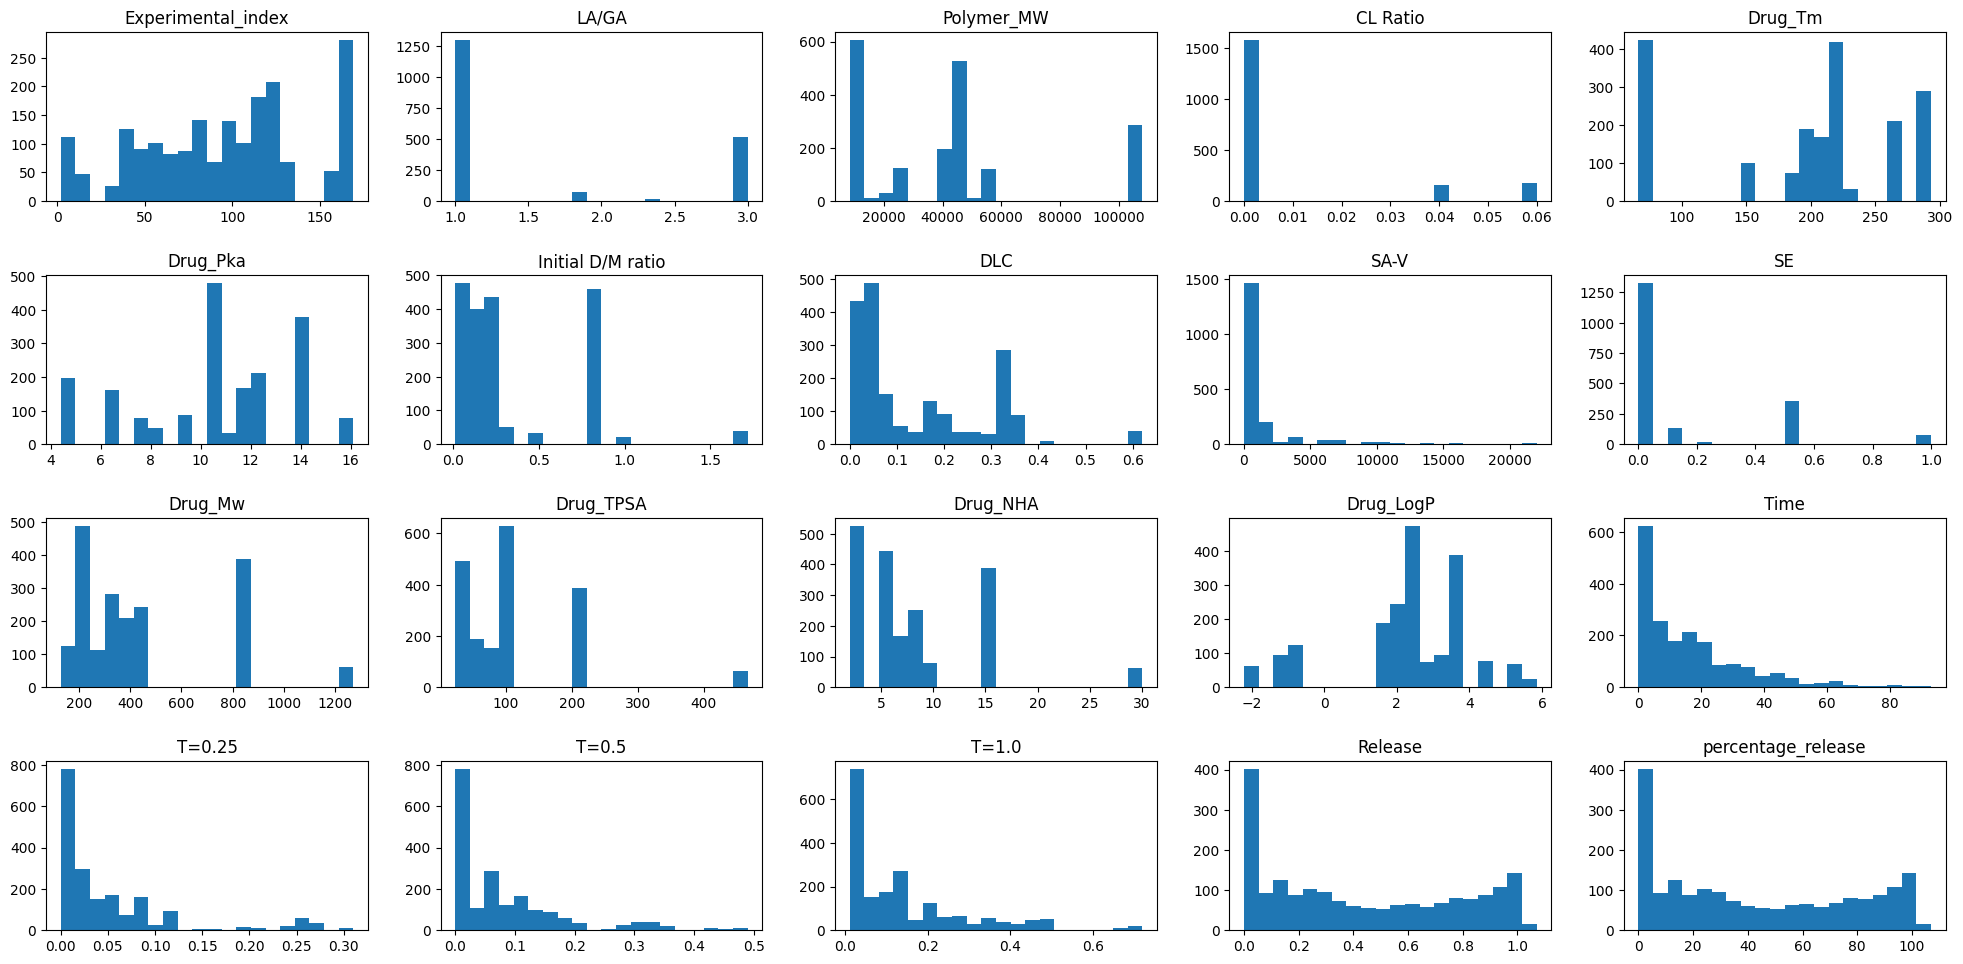

In [190]:
#Check how data is distributed, using histogram
df.hist(figsize=(20, 10), layout=(4, 5), bins=20, grid=False)
plt.tight_layout(pad=2.0)
plt.savefig('all_data_hist.png')
plt.show()


In [ ]:
## Checking how data is distributed using sns
# #saving the distribution image
# pairplot=sns.pairplot(df,hue = 'Category')
# pairplot.savefig('data_distribution.png')

In [99]:
df.columns

Index(['Experimental_index', 'DP_Group', 'LA/GA', 'Polymer_MW', 'CL Ratio',
       'Drug_Tm', 'Drug_Pka', 'Initial D/M ratio', 'DLC', 'SA-V', 'SE',
       'Drug_Mw', 'Drug_TPSA', 'Drug_NHA', 'Drug_LogP', 'Time', 'T=0.25',
       'T=0.5', 'T=1.0', 'Release', 'Drug_name', 'Category',
       'percentage_release'],
      dtype='object')

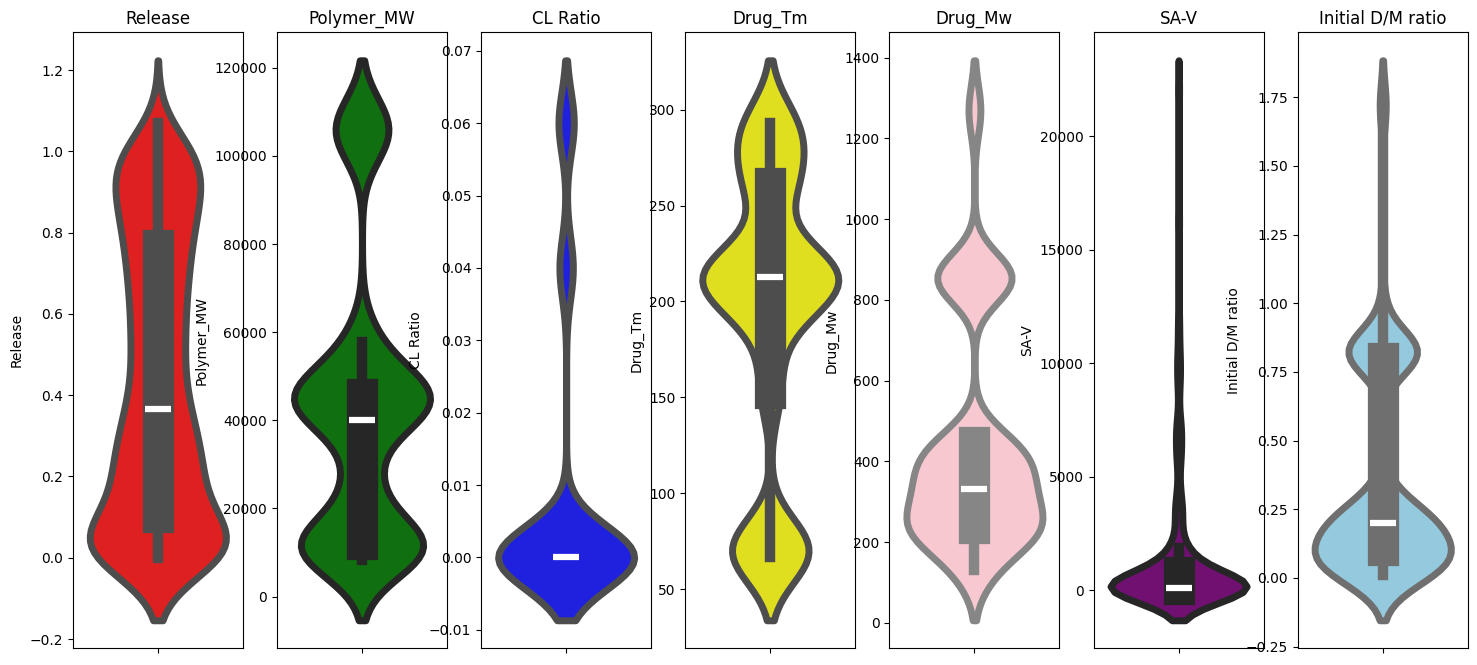

In [201]:
#seeing how all the data are distributed
plt.figure(figsize=(18,8))

plt.subplot(1, 7, 1)
plt.title('Release')
sns.violinplot(y='Release',data=df,color='red',linewidth=5)

plt.subplot(1, 7, 2)
plt.title('Polymer_MW')
sns.violinplot(y='Polymer_MW',data=df,color='green',linewidth=5)

plt.subplot(1, 7, 3)
plt.title('CL Ratio')
sns.violinplot(y='CL Ratio',data=df,color='blue',linewidth=5)

plt.subplot(1, 7, 4)
sns.violinplot(y='Drug_Tm',data=df,color='yellow', linewidth=5)
plt.title('Drug_Tm')

plt.subplot(1, 7, 5)
sns.violinplot(y='Drug_Mw',data=df,color='pink', linewidth=5)
plt.title('Drug_Mw')

plt.subplot(1, 7, 6)
sns.violinplot(y='SA-V',data=df,color='purple', linewidth=5)
plt.title('SA-V')

plt.subplot(1, 7, 7)
sns.violinplot(y='Initial D/M ratio',data=df,color='skyblue', linewidth=5)
plt.title('Initial D/M ratio')

# plt.savefig('data_violin.png')
plt.show()
# ##sample data dist

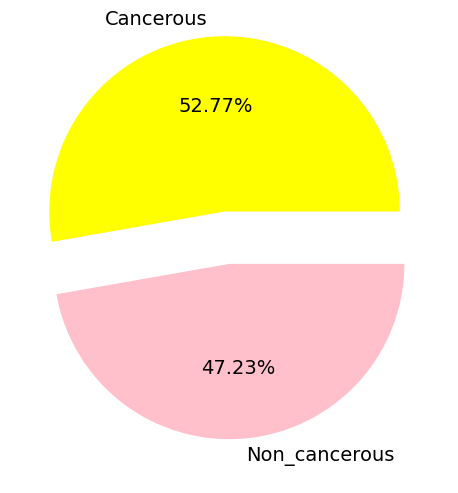

In [197]:
#plt.rcParams['figure.figsize'] = (30, 12)

plt.figure(figsize=(10,5))
size = df['Category'].value_counts()
labels = ['Cancerous', 'Non_cancerous']
colors = ['yellow', 'pink']
explode = (0.3, 0)

plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%', explode=explode, textprops={'fontsize': 14})
# plt.title('Category', fontsize=15)
plt.axis('off')

# Save and show the pie chart
plt.tight_layout()
plt.savefig('pie_cat.png')
plt.show()


In [171]:
# #checking outliers
# plt.subplots(1,4,figsize=(16,5))
# plt.subplot(141)
# sns.boxplot(df['LA/GA'],color='skyblue')
# plt.subplot(142)
# sns.boxplot(df['Drug_Mw'],color='hotpink')
# plt.subplot(143)
# sns.boxplot(df['Drug_LogP'],color='yellow')
# plt.subplot(144)
# sns.boxplot(df['Initial D/M ratio'],color='lightgreen')
# plt.show()

In [136]:
df.columns

Index(['Experimental_index', 'DP_Group', 'LA/GA', 'Polymer_MW', 'CL Ratio',
       'Drug_Tm', 'Drug_Pka', 'Initial D/M ratio', 'DLC', 'SA-V', 'SE',
       'Drug_Mw', 'Drug_TPSA', 'Drug_NHA', 'Drug_LogP', 'Time', 'T=0.25',
       'T=0.5', 'T=1.0', 'Release', 'Drug_name', 'Category',
       'percentage_release'],
      dtype='object')

C:\Users\DELL\AppData\Local\Temp\ipykernel_3384\3182968678.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Group_data2['percentage_release'].mean().index,y=Group_data2['percentage_release'].mean().values,palette = 'mako',ax=ax)


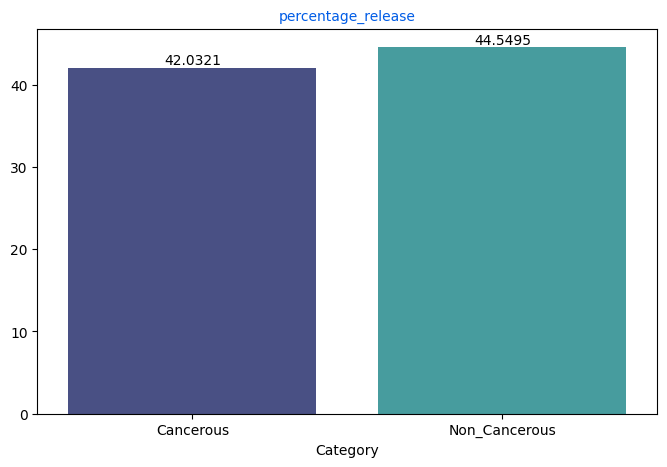

In [155]:
#which parameter is having affect on Release.
##see if Category has any affect on Release
Group_data2=df.groupby('Category')
f,ax=plt.subplots(1,1,figsize=(8,5))
sns.barplot(x=Group_data2['percentage_release'].mean().index,y=Group_data2['percentage_release'].mean().values,palette = 'mako',ax=ax)
ax.set_title('percentage_release',color='#005ce6',size=10)

for container in ax.containers:
    ax.bar_label(container,color='black',size=10)



In [164]:
df.columns

Index(['Experimental_index', 'DP_Group', 'LA/GA', 'Polymer_MW', 'CL Ratio',
       'Drug_Tm', 'Drug_Pka', 'Initial D/M ratio', 'DLC', 'SA-V', 'SE',
       'Drug_Mw', 'Drug_TPSA', 'Drug_NHA', 'Drug_LogP', 'Time', 'T=0.25',
       'T=0.5', 'T=1.0', 'Release', 'Drug_name', 'Category',
       'percentage_release'],
      dtype='object')

In [226]:
## Function to evalaute impact of parameters on percentage_release
def evaluate_impact(df, parameter, percentage_release, ax):
    mean_percentage_release = df.groupby(parameter)[percentage_release].mean().reset_index()
    sns.barplot(x=parameter, y=percentage_release, data=mean_percentage_release, palette='mako', ax=ax)
    ax.set_title(f'Mean Percentage Release by {parameter}', color='#005ce6', size=14)
    ax.set_xlabel(parameter, size=12)
    ax.set_ylabel('Mean Percentage Release', size=12)
    

C:\Users\DELL\AppData\Local\Temp\ipykernel_3384\377639683.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=parameter, y=percentage_release, data=mean_percentage_release, palette='mako', ax=ax)
C:\Users\DELL\AppData\Local\Temp\ipykernel_3384\377639683.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=parameter, y=percentage_release, data=mean_percentage_release, palette='mako', ax=ax)
C:\Users\DELL\AppData\Local\Temp\ipykernel_3384\377639683.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=parameter, y=percentage_release, data=m

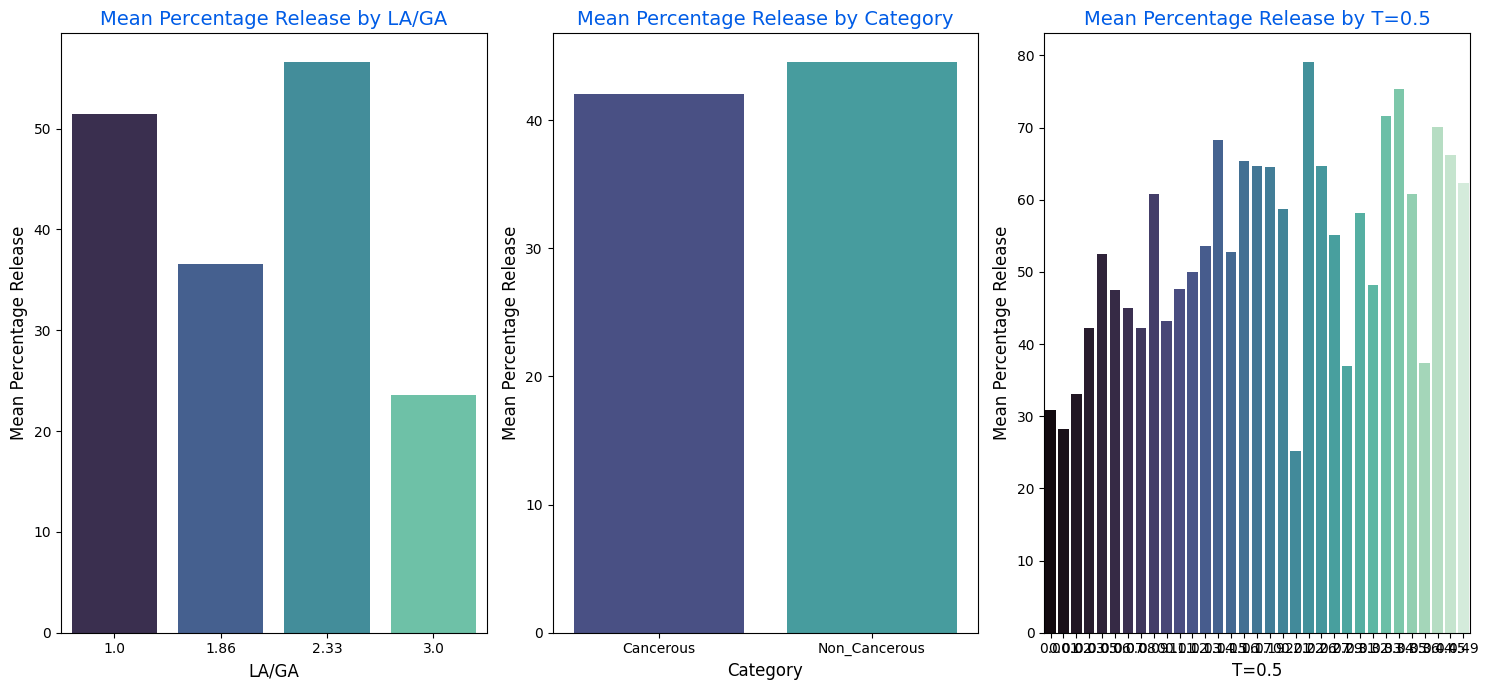

In [227]:
fig, axs = plt.subplots(1, 3, figsize=(15, 7))

# parametrs list to see imapct of these on release
parameters = ['LA/GA', 'Category','T=0.5']
for i, parameter in enumerate(parameters):
    evaluate_impact(df, parameter, 'percentage_release', ax=axs[i])

plt.tight_layout()

plt.savefig('impact_para.png')
plt.show()

In [204]:
df.columns

Index(['Experimental_index', 'DP_Group', 'LA/GA', 'Polymer_MW', 'CL Ratio',
       'Drug_Tm', 'Drug_Pka', 'Initial D/M ratio', 'DLC', 'SA-V', 'SE',
       'Drug_Mw', 'Drug_TPSA', 'Drug_NHA', 'Drug_LogP', 'Time', 'T=0.25',
       'T=0.5', 'T=1.0', 'Release', 'Drug_name', 'Category',
       'percentage_release'],
      dtype='object')

In [206]:
df1=df.drop(columns=['DP_Group','Category','Drug_name'])
df1.head()

,Experimental_index,LA/GA,Polymer_MW,CL Ratio,Drug_Tm,Drug_Pka,Initial D/M ratio,DLC,SA-V,SE,Drug_Mw,Drug_TPSA,Drug_NHA,Drug_LogP,Time,T=0.25,T=0.5,T=1.0,Release,percentage_release
0,80,1.0,104000.0,0.0,282.5,7.76,0.8,0.35,76.73,0.0,130.08,65.72,5.0,-0.8,0.00,0.09,0.19,0.35,0.00,0.0
1,80,1.0,104000.0,0.0,282.5,7.76,0.8,0.35,76.73,0.0,130.08,65.72,5.0,-0.8,0.26,0.09,0.19,0.35,0.07,7.0
2,80,1.0,104000.0,0.0,282.5,7.76,0.8,0.35,76.73,0.0,130.08,65.72,5.0,-0.8,1.06,0.09,0.19,0.35,0.40,40.0
3,80,1.0,104000.0,0.0,282.5,7.76,0.8,0.35,76.73,0.0,130.08,65.72,5.0,-0.8,2.09,0.09,0.19,0.35,0.57,57.0
4,80,1.0,104000.0,0.0,282.5,7.76,0.8,0.35,76.73,0.0,130.08,65.72,5.0,-0.8,3.11,0.09,0.19,0.35,0.69,69.0


In [207]:
df1.corr()

,Experimental_index,LA/GA,Polymer_MW,CL Ratio,Drug_Tm,Drug_Pka,Initial D/M ratio,DLC,SA-V,SE,Drug_Mw,Drug_TPSA,Drug_NHA,Drug_LogP,Time,T=0.25,T=0.5,T=1.0,Release,percentage_release
Experimental_index,1.000000,0.498975,-0.256154,0.669777,0.311372,-0.224847,0.482854,0.492211,-0.293092,0.151267,0.349426,0.345426,0.303760,0.027360,0.168798,-0.254058,-0.328295,-0.345643,-0.128543,-0.128543
LA/GA,0.498975,1.000000,-0.018527,0.715133,0.325882,-0.010545,0.355936,0.348379,0.207602,0.457696,0.546899,0.429725,0.428199,0.297531,0.190597,-0.326300,-0.359677,-0.369351,-0.349312,-0.349312
Polymer_MW,-0.256154,-0.018527,1.000000,-0.455948,0.244717,-0.270754,-0.157117,-0.211383,0.408919,-0.295959,-0.000685,0.069457,0.068186,-0.163980,-0.110703,0.098136,0.132605,0.176136,0.030302,0.030302
CL Ratio,0.669777,0.715133,-0.455948,1.000000,0.331612,0.063659,0.590400,0.596109,-0.189370,0.612985,0.376693,0.270275,0.274632,0.230113,0.220449,-0.304203,-0.346540,-0.376295,-0.265338,-0.265338
Drug_Tm,0.311372,0.325882,0.244717,0.331612,1.000000,-0.068405,0.439670,0.431266,-0.017352,0.241763,0.194952,0.217881,0.232462,-0.171205,0.054590,-0.198846,-0.219548,-0.197647,-0.082415,-0.082415
Drug_Pka,-0.224847,-0.010545,-0.270754,0.063659,-0.068405,1.000000,-0.041076,-0.059108,-0.136612,0.329247,0.023083,-0.112965,-0.052873,0.100823,0.076079,-0.061571,-0.079992,-0.079998,-0.040666,-0.040666
Initial D/M ratio,0.482854,0.355936,-0.157117,0.590400,0.439670,-0.041076,1.000000,0.937309,-0.272478,0.313262,0.089340,0.110521,0.093463,-0.124458,0.063213,0.216415,0.146214,0.138950,-0.050591,-0.050591
DLC,0.492211,0.348379,-0.211383,0.596109,0.431266,-0.059108,0.937309,1.000000,-0.277440,0.324986,0.151382,0.175297,0.145082,-0.110574,0.060136,0.197341,0.104463,0.063492,-0.089008,-0.089008
SA-V,-0.293092,0.207602,0.408919,-0.189370,-0.017352,-0.136612,-0.272478,-0.277440,1.000000,-0.181871,0.263244,0.209720,0.195558,0.222624,-0.072306,-0.034630,0.007967,0.047698,-0.100417,-0.100417
SE,0.151267,0.457696,-0.295959,0.612985,0.241763,0.329247,0.313262,0.324986,-0.181871,1.000000,0.303672,0.133169,0.228707,0.422422,0.212483,-0.180213,-0.183007,-0.187271,-0.183864,-0.183864


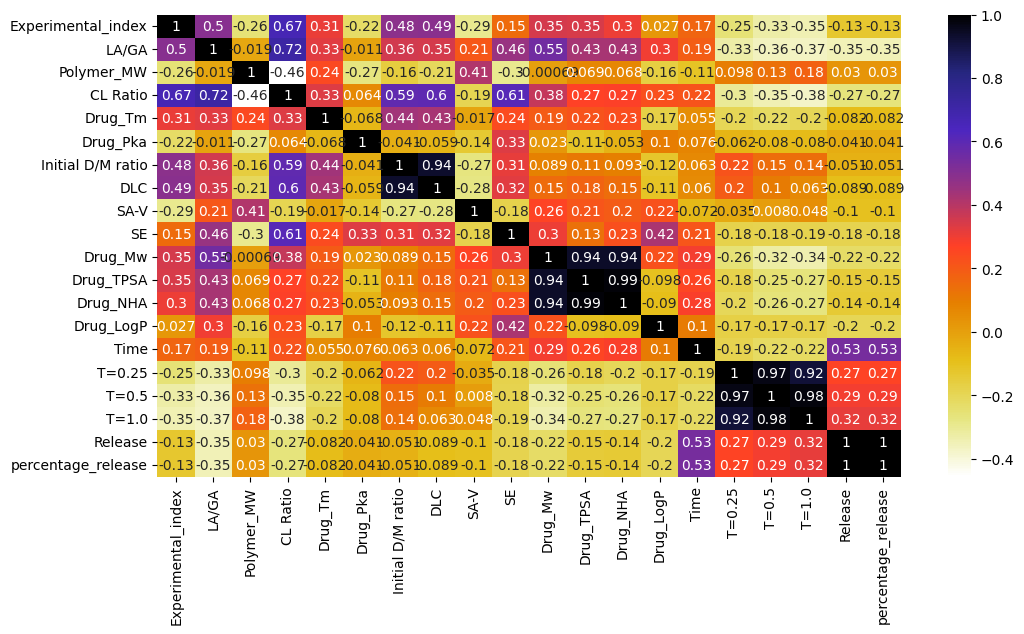

In [216]:
plt.figure(figsize=(12,6))
corr=df1.corr()
sns.heatmap(corr, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [231]:
corr.shape

(20, 20)

In [222]:
## correlated parameters
corr_param=set()
for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i,j])>0.9:
            col_name=corr.columns[i]
            corr_param.add(col_name)

In [228]:
corr_param=list(corr_param)

In [229]:
df1=df.drop(columns=corr_param)

In [230]:
df1

,Experimental_index,DP_Group,LA/GA,Polymer_MW,CL Ratio,Drug_Tm,Drug_Pka,Initial D/M ratio,SA-V,SE,Drug_Mw,Drug_LogP,Time,T=0.25,Release,Drug_name,Category
0,80,5-FU-PLGA,1.0,104000.0,0.0,282.5,7.76,0.8,76.73,0.00,130.08,-0.80,0.00,0.09,0.00,5-Fluorouracil,Cancerous
1,80,5-FU-PLGA,1.0,104000.0,0.0,282.5,7.76,0.8,76.73,0.00,130.08,-0.80,0.26,0.09,0.07,5-Fluorouracil,Cancerous
2,80,5-FU-PLGA,1.0,104000.0,0.0,282.5,7.76,0.8,76.73,0.00,130.08,-0.80,1.06,0.09,0.40,5-Fluorouracil,Cancerous
3,80,5-FU-PLGA,1.0,104000.0,0.0,282.5,7.76,0.8,76.73,0.00,130.08,-0.80,2.09,0.09,0.57,5-Fluorouracil,Cancerous
4,80,5-FU-PLGA,1.0,104000.0,0.0,282.5,7.76,0.8,76.73,0.00,130.08,-0.80,3.11,0.09,0.69,5-Fluorouracil,Cancerous
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3778,89,TTD-PLGA,1.0,8300.0,0.0,206.0,10.28,0.1,112.25,0.01,325.50,5.34,19.86,0.06,0.99,TAA,Non_Cancerous
3779,89,TTD-PLGA,1.0,8300.0,0.0,206.0,10.28,0.1,112.25,0.01,325.50,5.34,21.88,0.06,1.00,TAA,Non_Cancerous
3780,89,TTD-PLGA,1.0,8300.0,0.0,206.0,10.28,0.1,112.25,0.01,325.50,5.34,24.16,0.06,1.00,TAA,Non_Cancerous
3781,89,TTD-PLGA,1.0,8300.0,0.0,206.0,10.28,0.1,112.25,0.01,325.50,5.34,26.19,0.06,1.00,TAA,Non_Cancerous


In [233]:
df1=df1.drop(columns=['Experimental_index','DP_Group','Drug_name','Category'])

In [234]:
df1

,LA/GA,Polymer_MW,CL Ratio,Drug_Tm,Drug_Pka,Initial D/M ratio,SA-V,SE,Drug_Mw,Drug_LogP,Time,T=0.25,Release
0,1.0,104000.0,0.0,282.5,7.76,0.8,76.73,0.00,130.08,-0.80,0.00,0.09,0.00
1,1.0,104000.0,0.0,282.5,7.76,0.8,76.73,0.00,130.08,-0.80,0.26,0.09,0.07
2,1.0,104000.0,0.0,282.5,7.76,0.8,76.73,0.00,130.08,-0.80,1.06,0.09,0.40
3,1.0,104000.0,0.0,282.5,7.76,0.8,76.73,0.00,130.08,-0.80,2.09,0.09,0.57
4,1.0,104000.0,0.0,282.5,7.76,0.8,76.73,0.00,130.08,-0.80,3.11,0.09,0.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3778,1.0,8300.0,0.0,206.0,10.28,0.1,112.25,0.01,325.50,5.34,19.86,0.06,0.99
3779,1.0,8300.0,0.0,206.0,10.28,0.1,112.25,0.01,325.50,5.34,21.88,0.06,1.00
3780,1.0,8300.0,0.0,206.0,10.28,0.1,112.25,0.01,325.50,5.34,24.16,0.06,1.00
3781,1.0,8300.0,0.0,206.0,10.28,0.1,112.25,0.01,325.50,5.34,26.19,0.06,1.00


In [239]:
# df1.isnull().sum()

In [ ]:
### Data is ready for model creation